## Binary Classification

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Get the dataset
diabetes = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv')

In [3]:
#Look at data
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


This data consists of diagnostic information about some patients who have been tested for diabetes. The last column in our dataset __Diabetic__ is our label and it consists of value 0 or 1. 0 is for the patients who tested negative for diabetes and 1 is for those who tested positive. Rest of the columns are features and we'll use them for predicting whether the patient is Diabetic or not.


In [4]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


Time for visualization and observation.

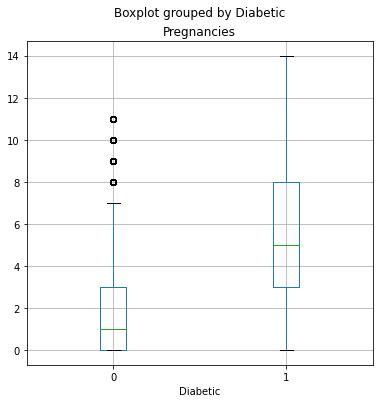

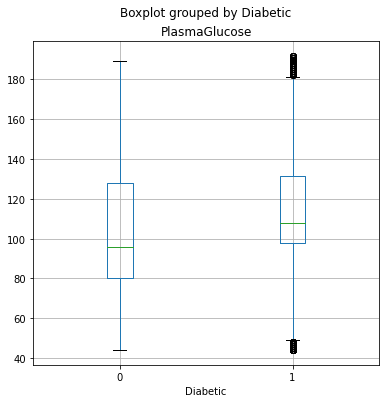

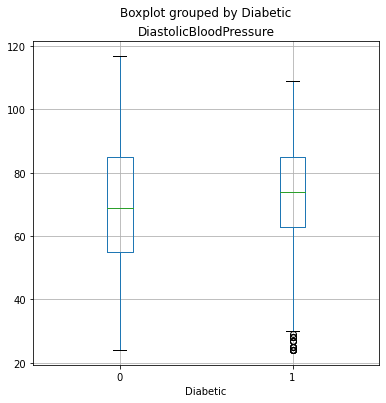

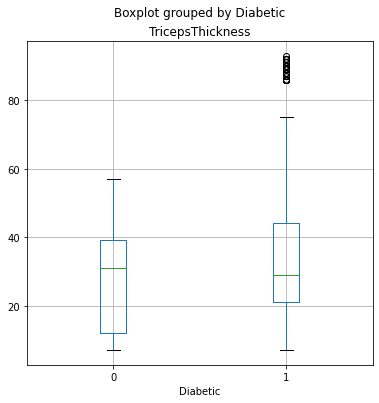

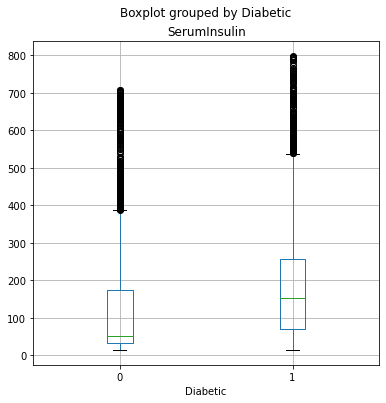

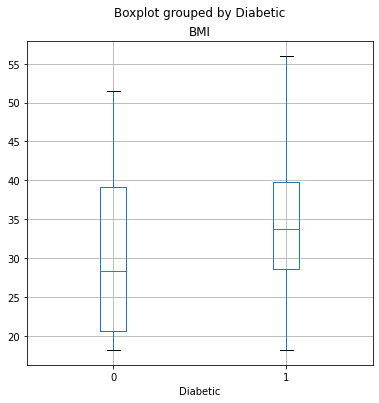

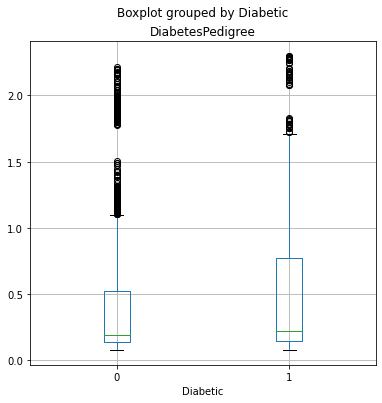

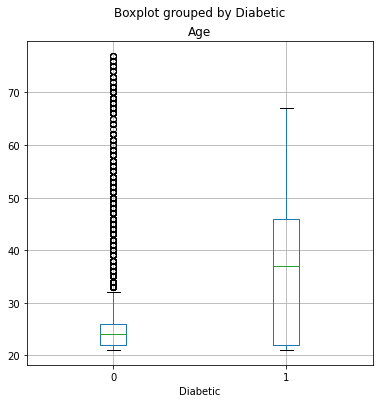

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticeable difference in the distribution for each label value. In particular, Pregnancies and Age show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

### Split the data

In [6]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


Now, It's time to train our model

In [7]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Now we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. 

In [8]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


In [9]:
#Testing accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7893333333333333


We can also check out *__classification_report__* which shows metrics like precision, recall, f1-score and support.

In [10]:
#Alternative to accuracy : classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



We can retrieve these values on their own by using the **precision_score** and **recall_score** metrics in scikit-learn (which by default assume a binary classification model).

In [11]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


The precision and recall metrics are derived from four possible prediction outcomes:
* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

These metrics are generally tabulated for the test set and shown together as a *confusion matrix*, which takes the following form:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

In Python, we can use the ***sklearn.metrics.confusion_matrix*** function to find these values for a trained classifier:

In [12]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


As we can see that the main diagonal elements are quiet larger than the other diagonal. Our model is performming pretty well.

As we know logistic regression is based on probablity. We can actually get the probability for each case using *__predit_proba__* method in following manner.

In [13]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81657116 0.18342884]
 [0.9630332  0.0369668 ]
 [0.80872619 0.19127381]
 ...
 [0.60692458 0.39307542]
 [0.10656641 0.89343359]
 [0.63859127 0.36140873]]


We can see there are two different probablities for each case and both probablities are greater than 0. So, in order to decide which class does the featues fall upon, a threshold value us set.

But this method cannot always work.

So, A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

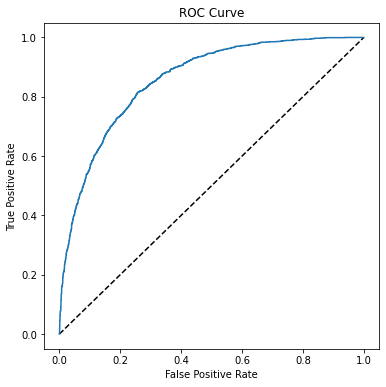

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so we obviously want the curve to be higher.

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric. We can calculate AUC in following manner:

In [15]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568444904932839


#############################################################################

## Perform Preprocessing in a Pipeline

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations we can perform to get our data ready for modeling:

### 1. Scaling numeric features

Normalizing numeric features so they're on the same scale prevents features with large values from producing coefficients that disproportionately affect the predictions. For example, suppose your data includes the following numeric features:

| A |  B  |  C  |
| - | --- | --- |
| 3 | 480 | 65  |
    
Normalizing these features to the same scale may result in the following values (assuming A contains values from 0 to 10, B contains values from 0 to 1000, and C contains values from 0 to 100):

|  A  |  B  |  C  |
| --  | --- | --- |
| 0.3 | 0.48| 0.65|

There are multiple ways you can scale numeric data, such as calculating the minimum and maximum values for each column and assigning a proportional value between 0 and 1, or by using the mean and standard deviation of a normally distributed variable to maintain the same *spread* of values on a different scale.


### 2. Encoding categorical variables

Machine learning models work best with numeric features rather than text values, so we generally need to convert categorical features into numeric representations.  For example, suppose our data includes the following categorical feature. 

| Size |
| ---- |
|  S   |
|  M   |
|  L   |

We can apply *ordinal encoding* to substitute a unique integer value for each category, like this:

| Size |
| ---- |
|  0   |
|  1   |
|  2   |

Another common technique is to use *one hot encoding* to create individual binary (0 or 1) features for each possible category value. For example, we could use one-hot encoding to translate the possible categories into binary columns like this:

|  Size_S  |  Size_M  |  Size_L  |
| -------  | -------- | -------- |
|    1     |     0    |    0     |
|    0     |     1    |    0     |
|    0     |     0    |    1     |

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named *pipelines*. These enable us to define a set of preprocessing steps that end with an algorithm. We can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).


In [16]:
#Import modules:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

In [17]:
# Define preprocessing for numeric columns (scale/Normalize them)
numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [18]:
# Define preprocessing for categorical features (encode them)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Creating a pipeline for LogisticRegression

In [20]:
# Create preprocessing and training pipeline
pipeline_LR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])

In [21]:
# fit the pipeline to train a linear regression model on the training set
model_LR = pipeline_LR.fit(X_train, (y_train))
print (model_LR)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.

So, the model is trained. Let's see how it performs with the validation data.

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202440539337694


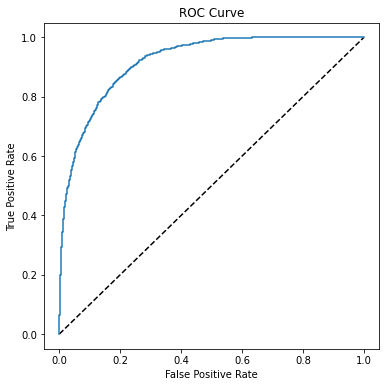

In [22]:
# Get predictions from test data
predictions_LR = model_LR.predict(X_test)
y_scores = model_LR.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions_LR)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions_LR))
print("Overall Precision:",precision_score(y_test, predictions_LR))
print("Overall Recall:",recall_score(y_test, predictions_LR))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## Trying out different algorithms:

###  SVM :

In [23]:
from sklearn.svm import SVC

In [24]:
# Create preprocessing and training pipeline
pipeline_SVM = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', SVC(kernel = 'rbf', probability = True))])


In [25]:
# fit the pipeline to train a random forest model on the training set
model_SVM = pipeline_SVM.fit(X_train, (y_train))
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Confusion Matrix:
 [[2776  210]
 [ 219 1295]] 

Accuracy: 0.9046666666666666
Overall Precision: 0.8604651162790697
Overall Recall: 0.8553500660501981
AUC: 0.9643306810027596


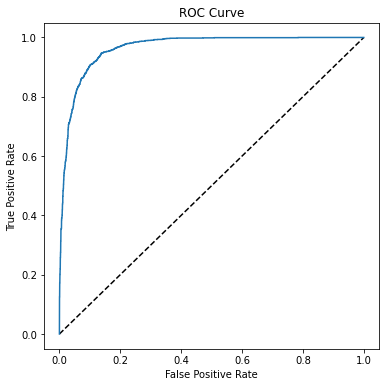

In [26]:
# Get predictions from test data
predictions_SVM = model_SVM.predict(X_test)
y_scores = model_SVM.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions_SVM)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions_SVM))
print("Overall Precision:",precision_score(y_test, predictions_SVM))
print("Overall Recall:",recall_score(y_test, predictions_SVM))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### RandomForestClassifier:

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Create preprocessing and training pipeline
pipeline_RFC = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

In [29]:
# fit the pipeline to train a random forest model on the training set
model_RFC = pipeline_RFC.fit(X_train, (y_train))
print (model_RFC)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2860  126]
 [ 174 1340]] 

Accuracy: 0.9333333333333333
Overall Precision: 0.9140518417462483
Overall Recall: 0.8850726552179656
AUC: 0.9818183889414362


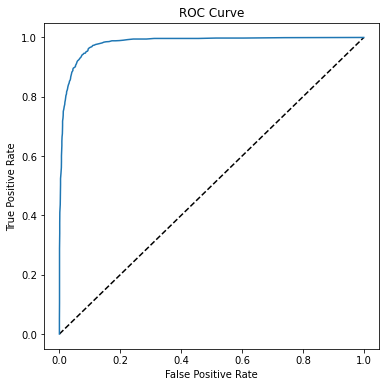

In [30]:
# Get predictions from test data
predictions_RFC = model_RFC.predict(X_test)
y_scores = model_RFC.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions_RFC)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions_RFC))
print("Overall Precision:",precision_score(y_test, predictions_RFC))
print("Overall Recall:",recall_score(y_test, predictions_RFC))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### DecisionTreeClassifier:

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Create preprocessing and training pipeline
pipeline_DTC = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', DecisionTreeClassifier(criterion="entropy", max_depth = 4))])

In [33]:
# fit the pipeline to train a random forest model on the training set
model_DTC = pipeline_DTC.fit(X_train, (y_train))
print (model_DTC)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])


Confusion Matrix:
 [[2628  358]
 [ 183 1331]] 

Accuracy: 0.8797777777777778
Overall Precision: 0.7880402605091771
Overall Recall: 0.8791281373844122
AUC: 0.9354507516804533


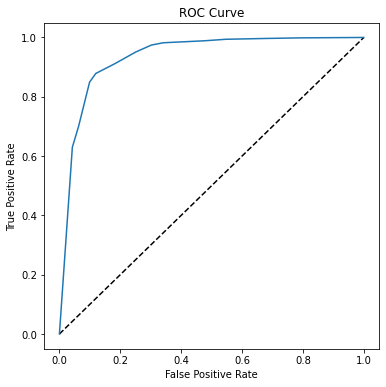

In [34]:
# Get predictions from test data
predictions_DTC = model_DTC.predict(X_test)
y_scores = model_DTC.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions_DTC)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions_DTC))
print("Overall Precision:",precision_score(y_test, predictions_DTC))
print("Overall Recall:",recall_score(y_test, predictions_DTC))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Random Forest Classifier turned out to be best classifier.

#############################################################################

## Use the Trained Model

Start by saving the model of each classifiers we just made.

In [35]:
import joblib


# Save the model_LR as a pickle file
filename_LR = './diabetes_model_LR.pkl'
joblib.dump(model_LR, filename_LR)



# Save the model_SVM as a pickle file
filename_SVM = './diabetes_model_SVM.pkl'
joblib.dump(model_SVM, filename_SVM)


# Save the model_RFC as a pickle file
filename_RFC = './diabetes_model_RFC.pkl'
joblib.dump(model_RFC, filename_RFC)


# Save the model_DTC as a pickle file
filename_DTC = './diabetes_model_DTC.pkl'
joblib.dump(model_DTC, filename_DTC)

['./diabetes_model_DTC.pkl']

When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label:

In [36]:
# Load the models from the file
model_LR = joblib.load(filename_LR)
model_SVM = joblib.load(filename_SVM)
model_RFC = joblib.load(filename_RFC)
model_DTC = joblib.load(filename_DTC)

# predict on a new sample
# The model accepts an array of feature arrays (so we can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred_LR = model_LR.predict(X_new)
pred_SVM = model_SVM.predict(X_new)
pred_RFC = model_RFC.predict(X_new)
pred_DTC = model_DTC.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class using Logistic Regression model is {}'.format(pred_LR[0]))
print('Predicted class using Support Vector Machine model is {}'.format(pred_SVM[0]))
print('Predicted class using Random Forest Classifier model is {}'.format(pred_RFC[0]))
print('Predicted class using Decision Tree Classifier model is {}'.format(pred_DTC[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class using Logistic Regression model is 0
Predicted class using Support Vector Machine model is 1
Predicted class using Random Forest Classifier model is 1
Predicted class using Decision Tree Classifier model is 1


So, that's pretty much it. 